### Practice prolbem - 2

# DNN

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [273]:
from tensorflow.keras.datasets import mnist

In [274]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [275]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

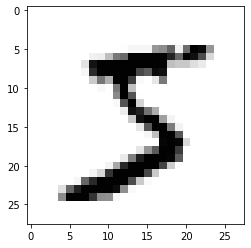

In [276]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [277]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%3d ' % i)
    sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [278]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [279]:
X_train.shape

(60000, 784)

In [280]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [281]:
Y_class_train[0]

5

In [282]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [283]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [284]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

In [285]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import os

In [286]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [295]:
# 모델 프레임 설정
model = Sequential([
    Dense(1000, input_dim=784, activation='relu'),
    Dense(200, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 1000)              785000    
_________________________________________________________________
dense_112 (Dense)            (None, 200)               200200    
_________________________________________________________________
dense_113 (Dense)            (None, 15)                3015      
_________________________________________________________________
dense_114 (Dense)            (None, 10)                160       
Total params: 988,375
Trainable params: 988,375
Non-trainable params: 0
_________________________________________________________________


In [296]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [297]:
# 모델 최적화 설정
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [298]:
modelpath = MODEL_DIR + "mnist{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [299]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=100, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

#history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
#                    epochs=30, batch_size=200, verbose=0, 
#                    callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.16060, saving model to ./model/mnist01-0.1606.hdf5

Epoch 00002: val_loss improved from 0.16060 to 0.09760, saving model to ./model/mnist02-0.0976.hdf5

Epoch 00003: val_loss improved from 0.09760 to 0.08418, saving model to ./model/mnist03-0.0842.hdf5

Epoch 00004: val_loss did not improve from 0.08418

Epoch 00005: val_loss improved from 0.08418 to 0.07797, saving model to ./model/mnist05-0.0780.hdf5

Epoch 00006: val_loss did not improve from 0.07797

Epoch 00007: val_loss did not improve from 0.07797

Epoch 00008: val_loss did not improve from 0.07797

Epoch 00009: val_loss did not improve from 0.07797

Epoch 00010: val_loss did not improve from 0.07797

Epoch 00011: val_loss did not improve from 0.07797

Epoch 00012: val_loss did not improve from 0.07797

Epoch 00013: val_loss did not improve from 0.07797

Epoch 00014: val_loss did not improve from 0.07797

Epoch 00015: val_loss did not improve from 0.07797

Epoch 00016: val_loss did n

In [300]:
del model

In [301]:
from tensorflow.keras.models import load_model
model = load_model('model/mnist05-0.0780.hdf5')

In [302]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=2)[1]))

10000/10000 - 0s - loss: 0.0689 - accuracy: 0.9783

 Test Accuracy: 0.9783


# CNN

In [305]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [303]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [306]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1), activation = 'relu'),
    Conv2D(64, (3,3), activation= 'relu'),
    MaxPooling2D(pool_size=2),
    Dense(500, activation='relu'),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dense_115 (Dense)            (None, 12, 12, 500)       32500     
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 500)       0         
_________________________________________________________________
flatten (Flatten)            (None, 72000)             0         
_________________________________________________________________
dense_116 (Dense)            (None, 128)             

In [307]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [308]:
#모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [310]:
modelpath = MODEL_DIR +"mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [311]:
#모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50,
                    batch_size=
                    , #epochs=5, verbose=2,
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.2170 - accuracy: 0.9326
Epoch 00001: val_loss improved from inf to 0.04663, saving model to ./model/mnist-cnn-01-0.0466.hdf5
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.2168 - accuracy: 0.9327 - val_loss: 0.0466 - val_accuracy: 0.9850
Epoch 2/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.0767 - accuracy: 0.9770
Epoch 00002: val_loss improved from 0.04663 to 0.03666, saving model to ./model/mnist-cnn-02-0.0367.hdf5
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.0767 - accuracy: 0.9770 - val_loss: 0.0367 - val_accuracy: 0.9868
Epoch 3/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.0564 - accuracy: 0.9833
Epoch 00003: val_loss improved from 0.03666 to 0.03177, saving model to ./model/mnist-cnn-03-0.0318.hdf5
60000/60000 [==============================] - 104s 2ms/sampl

Epoch 28/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9971
Epoch 00028: val_loss did not improve from 0.02425
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.0331 - val_accuracy: 0.9925
Epoch 29/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.9973
Epoch 00029: val_loss did not improve from 0.02425
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.0311 - val_accuracy: 0.9931
Epoch 30/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9974
Epoch 00030: val_loss did not improve from 0.02425
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0384 - val_accuracy: 0.9934
Epoch 31/50
59800/60000 [============================>.] - ETA: 0s - loss: 0.0080 - accuracy: 0.9973
Epoch 00031: val_loss did 

In [312]:
from tensorflow.keras.models import load_model
del model
model = load_model('./model/mnist-cnn-15-0.0243.hdf5')

In [313]:
#테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9938
